In [1]:
import pickle
import matplotlib.pyplot as plot
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
import numpy as np
import pandas as pd
from sklearn import preprocessing
from pandas import DataFrame
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
# 这个代码没有rfe步骤，用软件rfe后放进来这里

In [1]:
dataset= r'18特征.csv'
data=pd.DataFrame(pd.read_csv(dataset))

NameError: name 'pd' is not defined

In [ ]:
X = data.values[:, :-1]
y = data.values[:, -1]
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=1)


for i in range(X_train.shape[1]):
    X_train[:, [i]] = preprocessing.MinMaxScaler().fit_transform(X_train[:, [i]])



for i in range(X_test.shape[1]):
    X_test[:, [i]] = preprocessing.MinMaxScaler().fit_transform(X_test[:, [i]])

In [ ]:
# 创建符号分类器
reg = SymbolicClassifier(population_size=5000, generations=30, tournament_size=20,
                         stopping_criteria=0.0, const_range=(-1.0, 1.0), verbose=1)
reg.fit(X_train, y_train)

In [4]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import train_test_split


# param_grid = {
#     'n_estimators': [50,80,100,120],
#     'max_depth': [6, 7],
#     'min_samples_split': [2],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features':[1,2],
#     'random_state':[0,1]
# }

# # Create a RandomForestClassifier object
# rfc = RandomForestClassifier()

# # Create a GridSearchCV object
# grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)

# # Fit the GridSearchCV object to the data
# grid_search.fit(X_train, y_train)

# # Print the best parameters and score
# print(f"Best parameters: {grid_search.best_params_}")
# print(f"Best score: {grid_search.best_score_}")




In [5]:
clf = RandomForestClassifier(max_depth=6,random_state=0,min_samples_leaf=1,max_features=1,min_samples_split=2,n_estimators=50)
clf.fit(X,y)

RandomForestClassifier(max_depth=6, max_features=1, n_estimators=50,
                       random_state=0)

In [6]:
RF=clf.fit(X,y)           
pickle.dump(RF,open("RF.dat","wb"))

Confusion Matrix:
[[73 13]
 [13 17]]


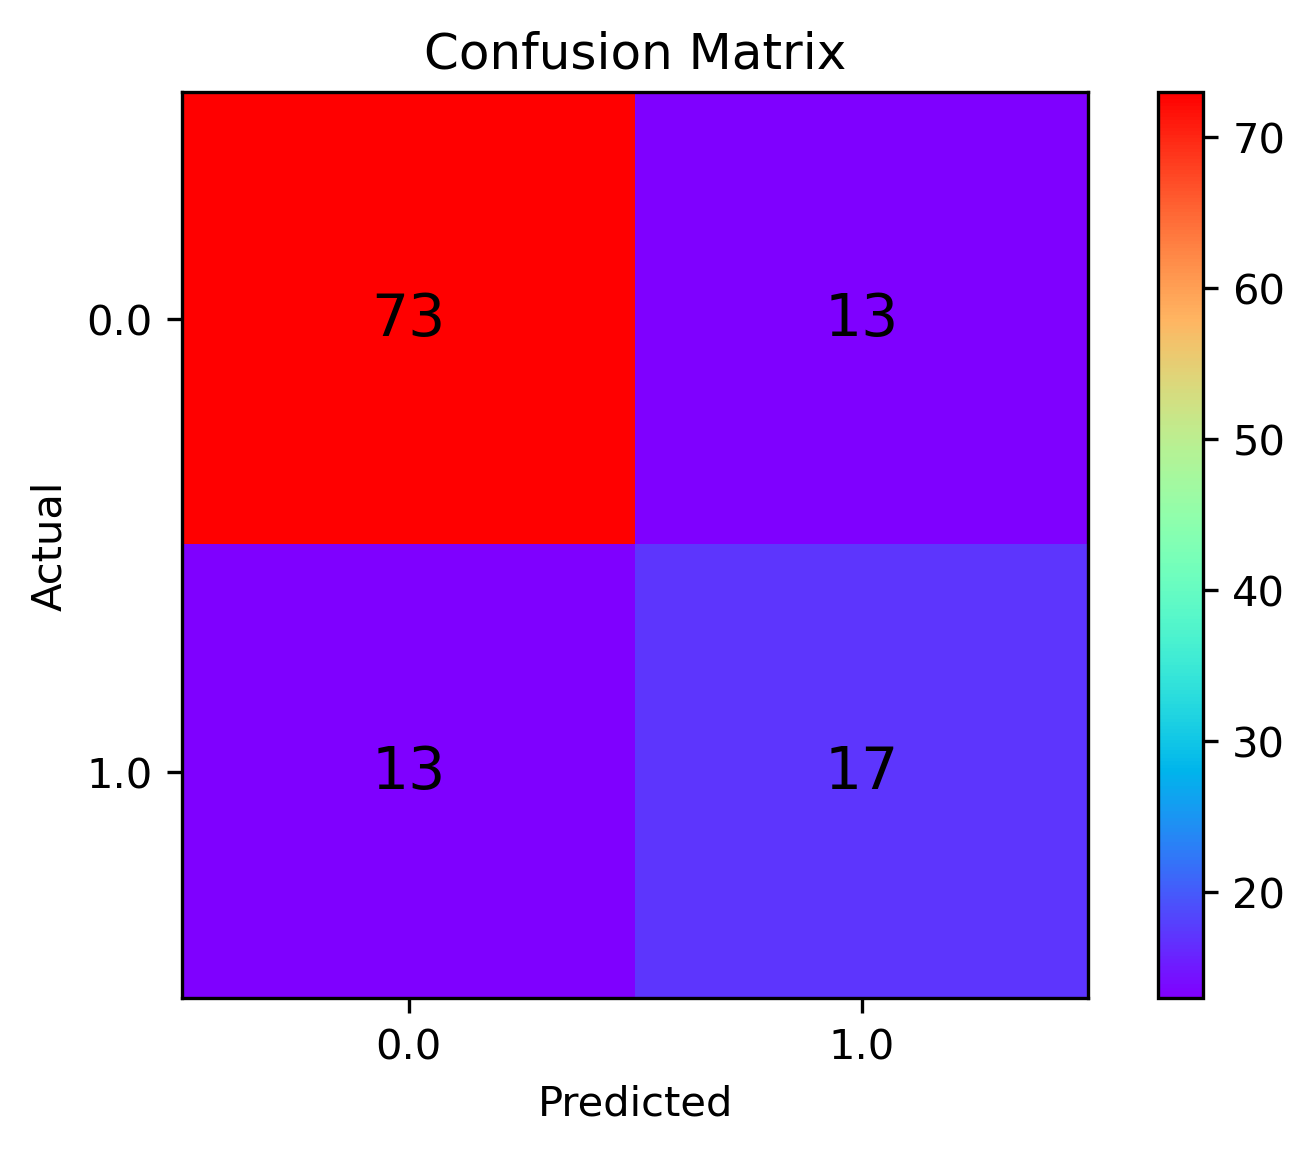

In [7]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Prediction on test set
y_pred = clf.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
plt.figure(dpi=300)
plt.imshow(cm, cmap="rainbow")
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(np.arange(len(set(y))), set(y))
plt.yticks(np.arange(len(set(y))), set(y))

# Adding text to the confusion matrix cells with larger font size
for i in range(len(set(y))):
    for j in range(len(set(y))):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='black', fontsize=14)
plt.savefig('RF_test.png')
plt.show()

Confusion Matrix:
[[163  45]
 [ 27  33]]


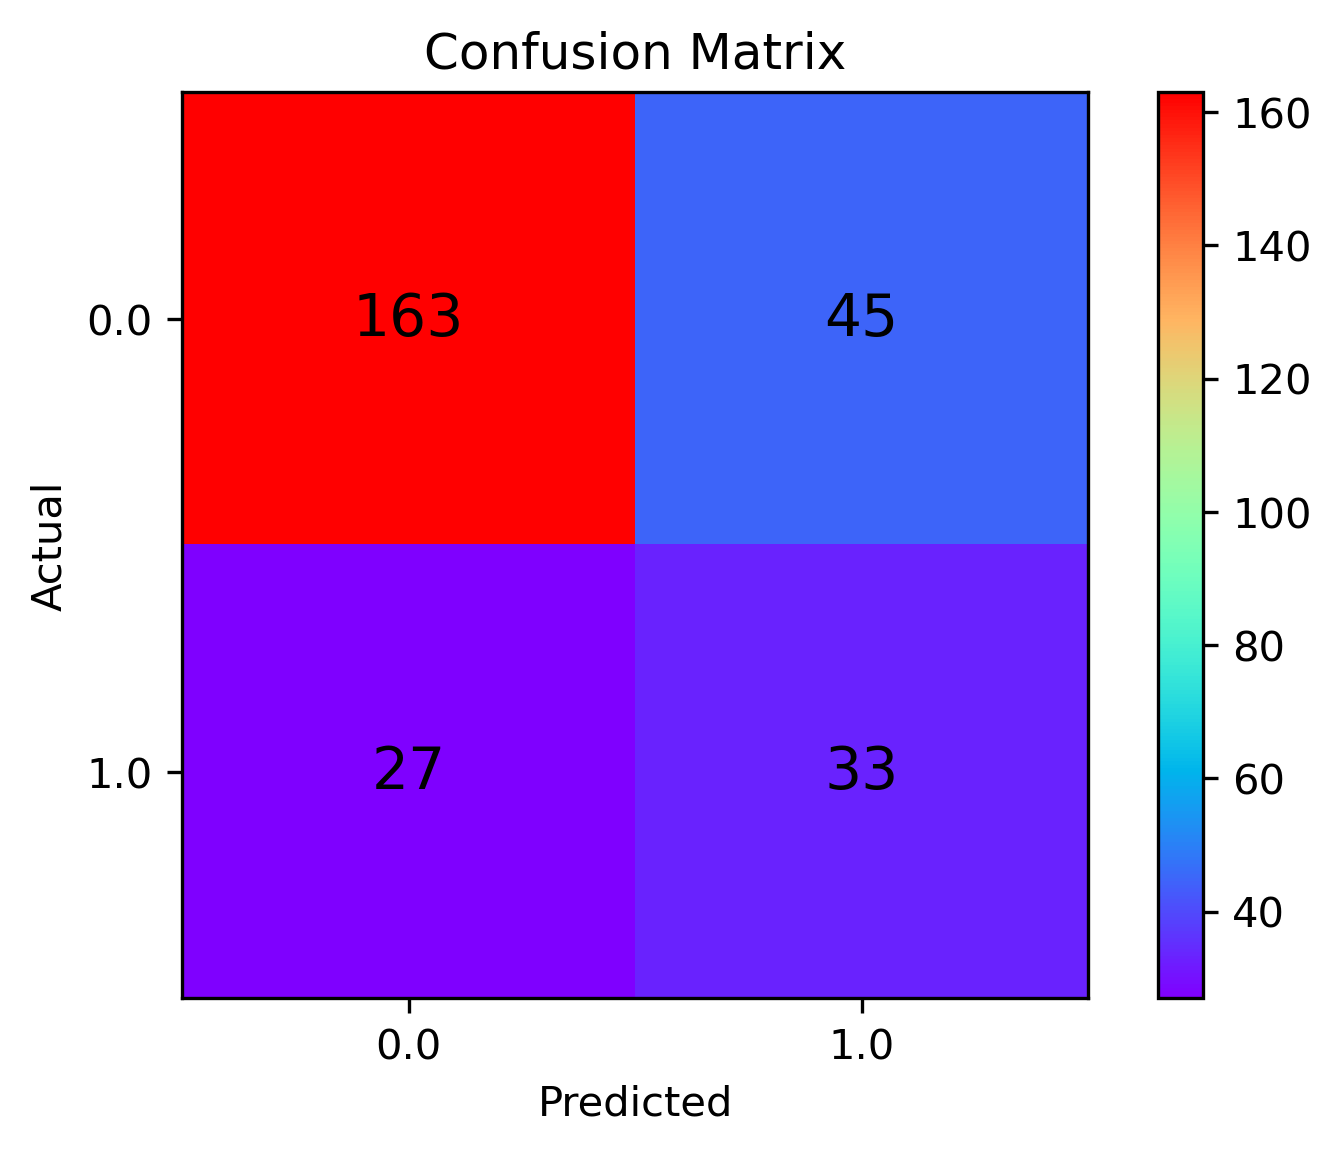

In [8]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Prediction on test set
y_pred = clf.predict(X_train)

# Confusion matrix
cm = confusion_matrix(y_train, y_pred)
print("Confusion Matrix:")
print(cm)
plt.figure(dpi=300)
plt.imshow(cm, cmap="rainbow")
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(np.arange(len(set(y))), set(y))
plt.yticks(np.arange(len(set(y))), set(y))

# Adding text to the confusion matrix cells with larger font size
for i in range(len(set(y))):
    for j in range(len(set(y))):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='black', fontsize=14)
plt.savefig('RF_train.png')
plt.show()

[0.         0.01162791 0.02325581 0.02325581 0.04651163 0.04651163
 0.05813953 0.05813953 0.05813953 0.06976744 0.06976744 0.09302326
 0.11627907 0.11627907 0.13953488 0.1627907  0.18604651 0.18604651
 0.20930233 0.24418605 0.30232558 0.3255814  0.36046512 0.38372093
 0.43023256 0.46511628 0.46511628 0.51162791 0.54651163 0.56976744
 0.59302326 0.62790698 0.6744186  0.69767442 0.72093023 0.73255814
 0.74418605 0.75581395 0.80232558 0.81395349 0.81395349 0.81395349
 0.8255814  0.84883721 0.87209302 0.90697674 0.91860465 0.94186047
 0.96511628 0.98837209 1.        ]
[0.         0.03333333 0.03333333 0.1        0.1        0.2
 0.2        0.23333333 0.43333333 0.43333333 0.46666667 0.46666667
 0.5        0.53333333 0.53333333 0.6        0.6        0.66666667
 0.66666667 0.66666667 0.66666667 0.66666667 0.66666667 0.7
 0.7        0.7        0.76666667 0.76666667 0.76666667 0.76666667
 0.76666667 0.8        0.8        0.8        0.8        0.8
 0.83333333 0.83333333 0.83333333 0.83333333 0.8

<Figure size 432x288 with 0 Axes>

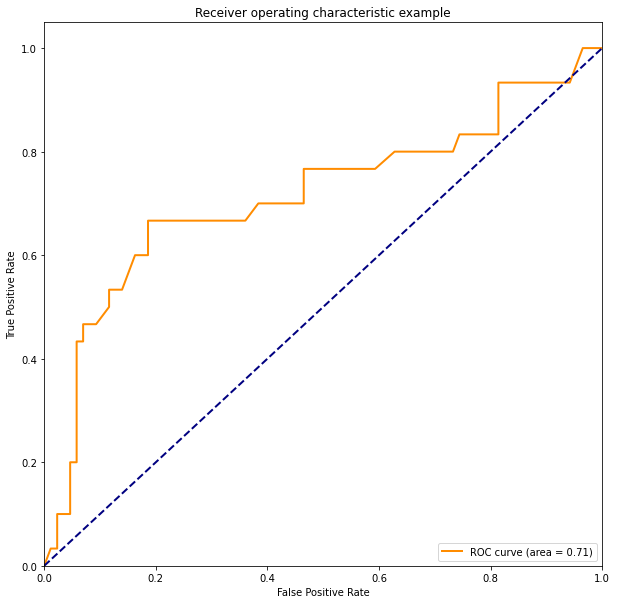

In [9]:
#画出ROC曲线 ExtraTrees test
y_score = clf.fit(X, y).predict_proba(X_test)
fpr,tpr,threshold = roc_curve(y_test, y_score[:, 1])
roc_auc = auc(fpr,tpr)
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
print(fpr)
print(tpr)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.savefig('RF_test的ROC.png')
plt.show()

[0.         0.         0.01923077 0.01923077 0.04807692 0.04807692
 0.0625     0.0625     0.08173077 0.10096154 0.10096154 0.10096154
 0.12019231 0.14903846 0.15384615 0.16346154 0.17788462 0.18269231
 0.1875     0.19711538 0.21634615 0.21634615 0.21634615 0.22596154
 0.25480769 0.26442308 0.28365385 0.28365385 0.30769231 0.31730769
 0.34134615 0.36057692 0.375      0.38461538 0.40865385 0.42788462
 0.44711538 0.45673077 0.45673077 0.47596154 0.50480769 0.51442308
 0.54326923 0.55769231 0.56730769 0.58653846 0.59615385 0.60096154
 0.61538462 0.64903846 0.65865385 0.67788462 0.6875     0.72115385
 0.75       0.75961538 0.77403846 0.78846154 0.80288462 0.80769231
 0.80769231 0.82211538 0.84134615 0.85096154 0.86538462 0.875
 0.89903846 0.93269231 0.9375     0.95673077 0.96634615 0.98076923
 1.        ]
[0.         0.03333333 0.08333333 0.11666667 0.11666667 0.13333333
 0.13333333 0.18333333 0.2        0.2        0.21666667 0.28333333
 0.28333333 0.3        0.4        0.41666667 0.4166666

<Figure size 432x288 with 0 Axes>

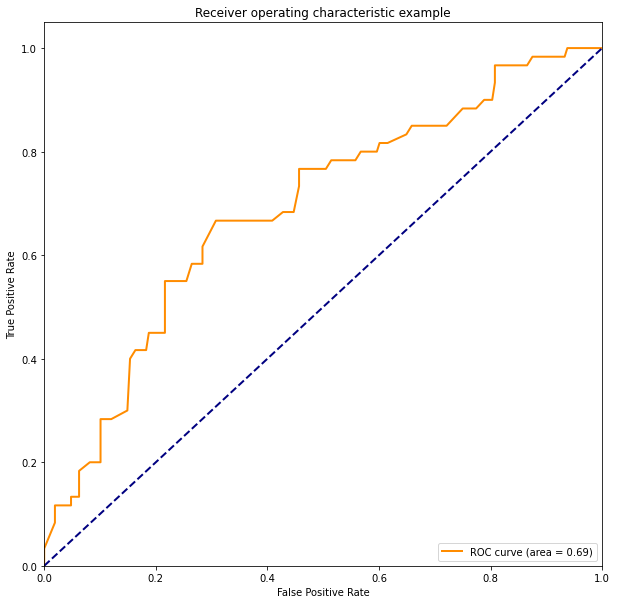

In [10]:
#画出ROC曲线 ExtraTrees train
y_score = clf.fit(X, y).predict_proba(X_train)
fpr,tpr,threshold = roc_curve(y_train, y_score[:, 1])
roc_auc = auc(fpr,tpr)
plt.figure()
lw = 2
plt.figure(figsize=(10,10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc) ###假正率为横坐标，真正率为纵坐标做曲线
print(fpr)
print(tpr)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.savefig('RF_train的ROC.png')
plt.show()

In [35]:
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.datasets import make_classification
# from sklearn.metrics import accuracy_score, make_scorer
# # Generate some data for classification
# X, y = X_train, y_train
# # Define the ExtraTreesClassifier
# et_clf = ExtraTreesClassifier()

# # Define the parameters to search
# params = {
#     'n_estimators': [2,50,100, 200],
#     'max_depth': [None, 5, 7,10],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2', None]
# }

# # Define the scoring metric
# scoring = make_scorer(accuracy_score)

# # Define the grid search with cross-validation
# grid_search = GridSearchCV(et_clf, params, scoring=scoring, cv=5, n_jobs=-1)

# # Fit the grid search to the data
# grid_search.fit(X, y)

# # Print the best parameters and best score
# print("Best Parameters: ", grid_search.best_params_)
# print("Best Score: ", grid_search.best_score_)


Best Parameters:  {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Best Score:  0.8182186234817813


In [11]:
clf=ExtraTreesClassifier(n_estimators=50, max_depth=7,min_samples_split=2, max_features= 'sqrt',min_samples_leaf= 2)
clf.fit(X,y)

ExtraTreesClassifier(max_depth=7, min_samples_leaf=2, n_estimators=50)

In [12]:
ET=clf.fit(X,y)           
pickle.dump(RF,open("ET.dat","wb"))

Confusion Matrix:
[[76 10]
 [15 15]]


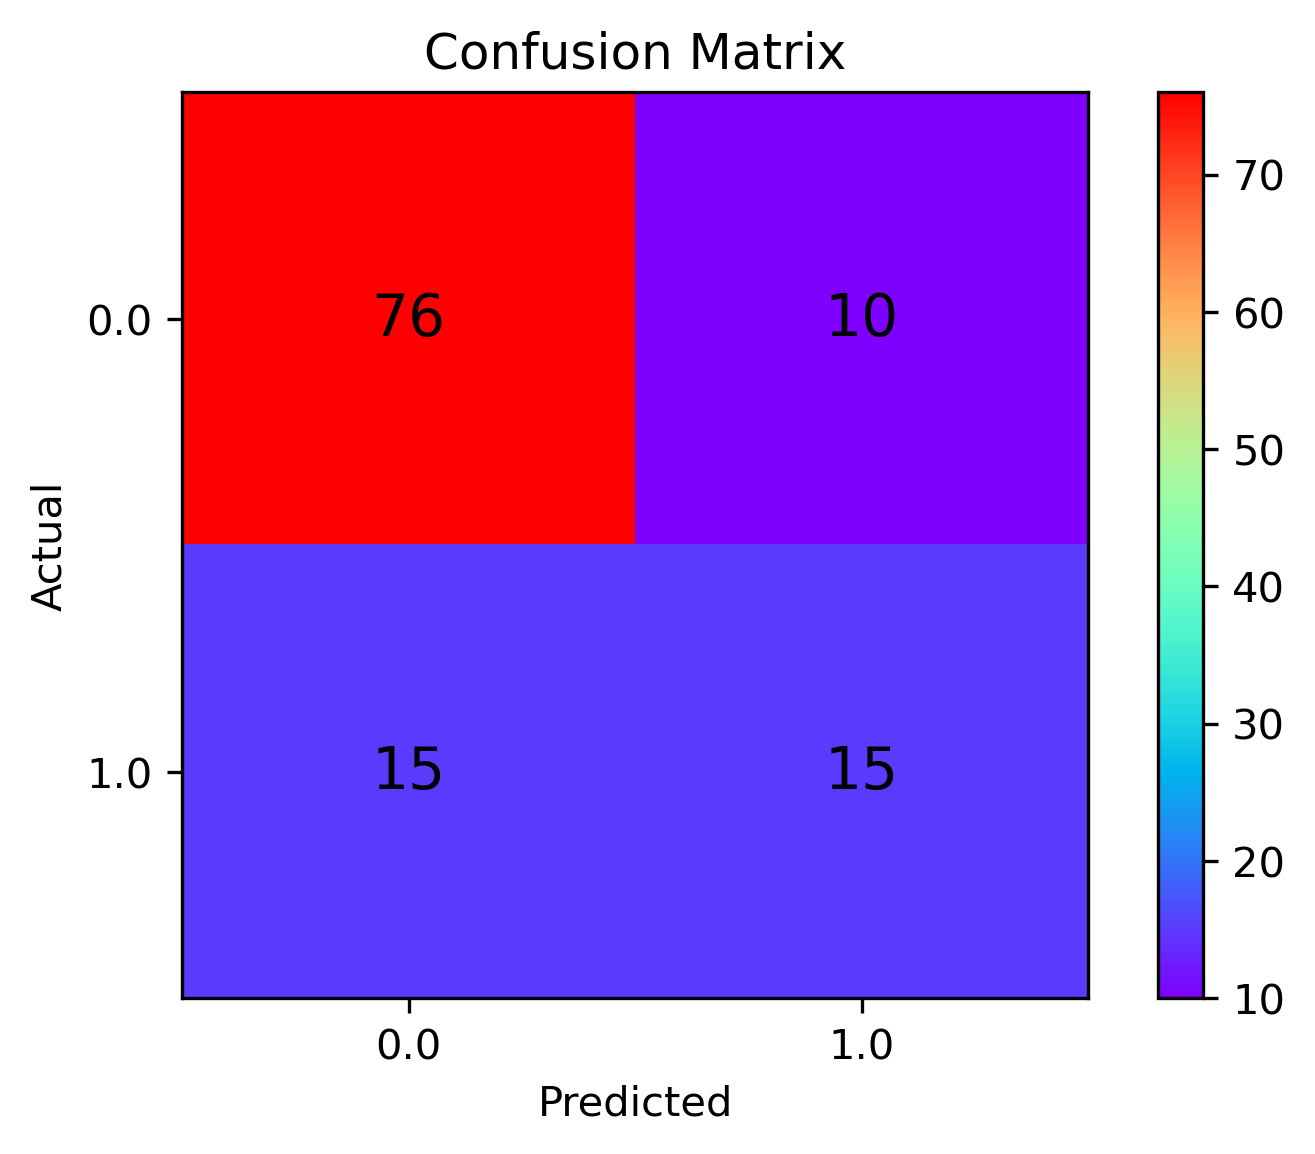

In [13]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Prediction on test set
y_pred = clf.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
plt.figure(dpi=300)
plt.imshow(cm, cmap="rainbow")
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(np.arange(len(set(y))), set(y))
plt.yticks(np.arange(len(set(y))), set(y))

# Adding text to the confusion matrix cells with larger font size
for i in range(len(set(y))):
    for j in range(len(set(y))):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='black', fontsize=14)
plt.savefig('ET_test.png')
plt.show()

Confusion Matrix:
[[170  38]
 [ 39  21]]


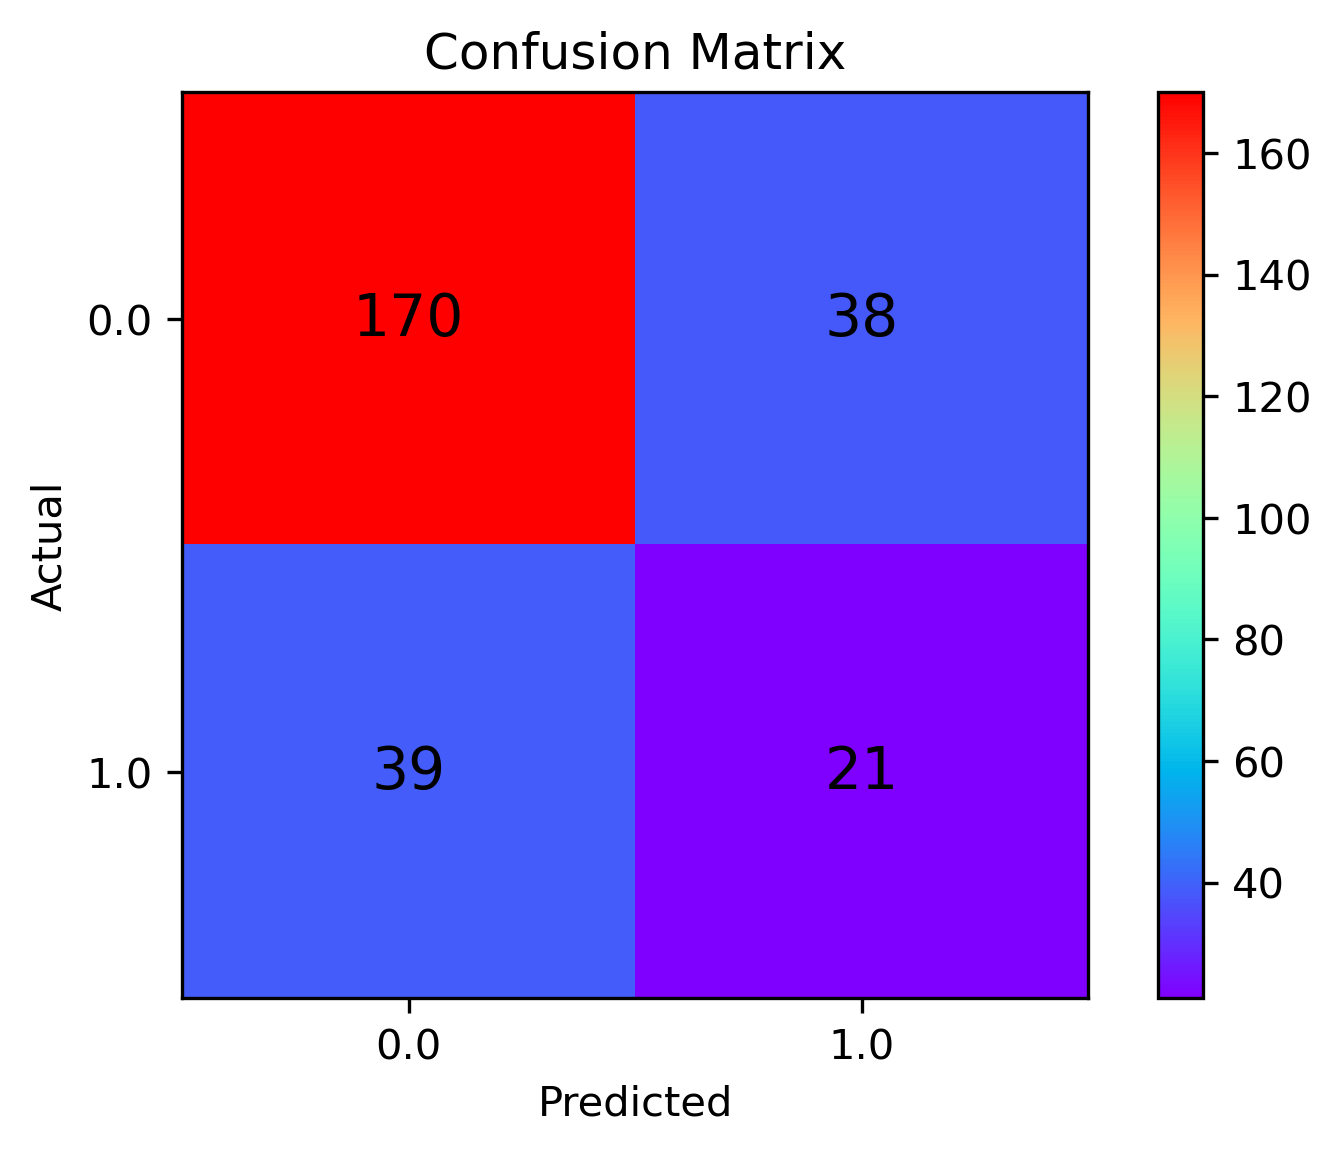

In [14]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Prediction on test set
y_pred = clf.predict(X_train)

# Confusion matrix
cm = confusion_matrix(y_train, y_pred)
print("Confusion Matrix:")
print(cm)
plt.figure(dpi=300)
plt.imshow(cm, cmap="rainbow")
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(np.arange(len(set(y))), set(y))
plt.yticks(np.arange(len(set(y))), set(y))

# Adding text to the confusion matrix cells with larger font size
for i in range(len(set(y))):
    for j in range(len(set(y))):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='black', fontsize=14)
plt.savefig('ET_train.png')
plt.show()

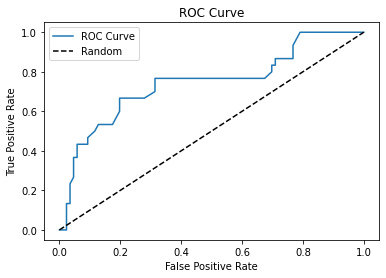

Accuracy: 0.7844827586206896


In [15]:
# ROC Curve
y_probs = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Plotting ROC Curve
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.savefig('ET_test的ROC.png')
plt.show()

# Accuracy
accuracy = clf.score(X_test, y_test)
print("Accuracy:", accuracy)


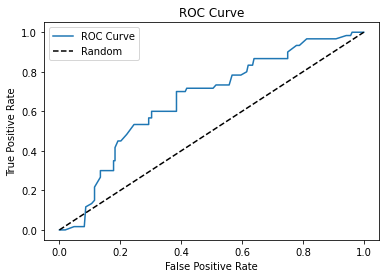

Accuracy: 0.7126865671641791


In [16]:
# ROC Curve
y_probs = clf.predict_proba(X_train)[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, y_probs)

# Plotting ROC Curve
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.savefig('ET_train的ROC.png')
plt.show()

# Accuracy
accuracy = clf.score(X_train, y_train)
print("Accuracy:", accuracy)

In [33]:
# from sklearn.gaussian_process import GaussianProcessClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.gaussian_process.kernels import RBF

# param_grid = {'kernel': [1*RBF(length_scale=1), 1*RBF(length_scale=0.5), 1*RBF(length_scale=2)], 'n_restarts_optimizer': [0, 1, 2]}

# gpc = GaussianProcessClassifier()

# grid_search = GridSearchCV(gpc, param_grid=param_grid)

# grid_search.fit(X_train, y_train)
# print(grid_search.best_params_)


In [193]:
clf =GaussianProcessClassifier(kernel= 1*RBF(length_scale=0.5), n_restarts_optimizer = 0)
clf.fit(X,y)

GaussianProcessClassifier(kernel=1**2 * RBF(length_scale=0.5))

Confusion Matrix:
[[142   0]
 [ 48   0]]


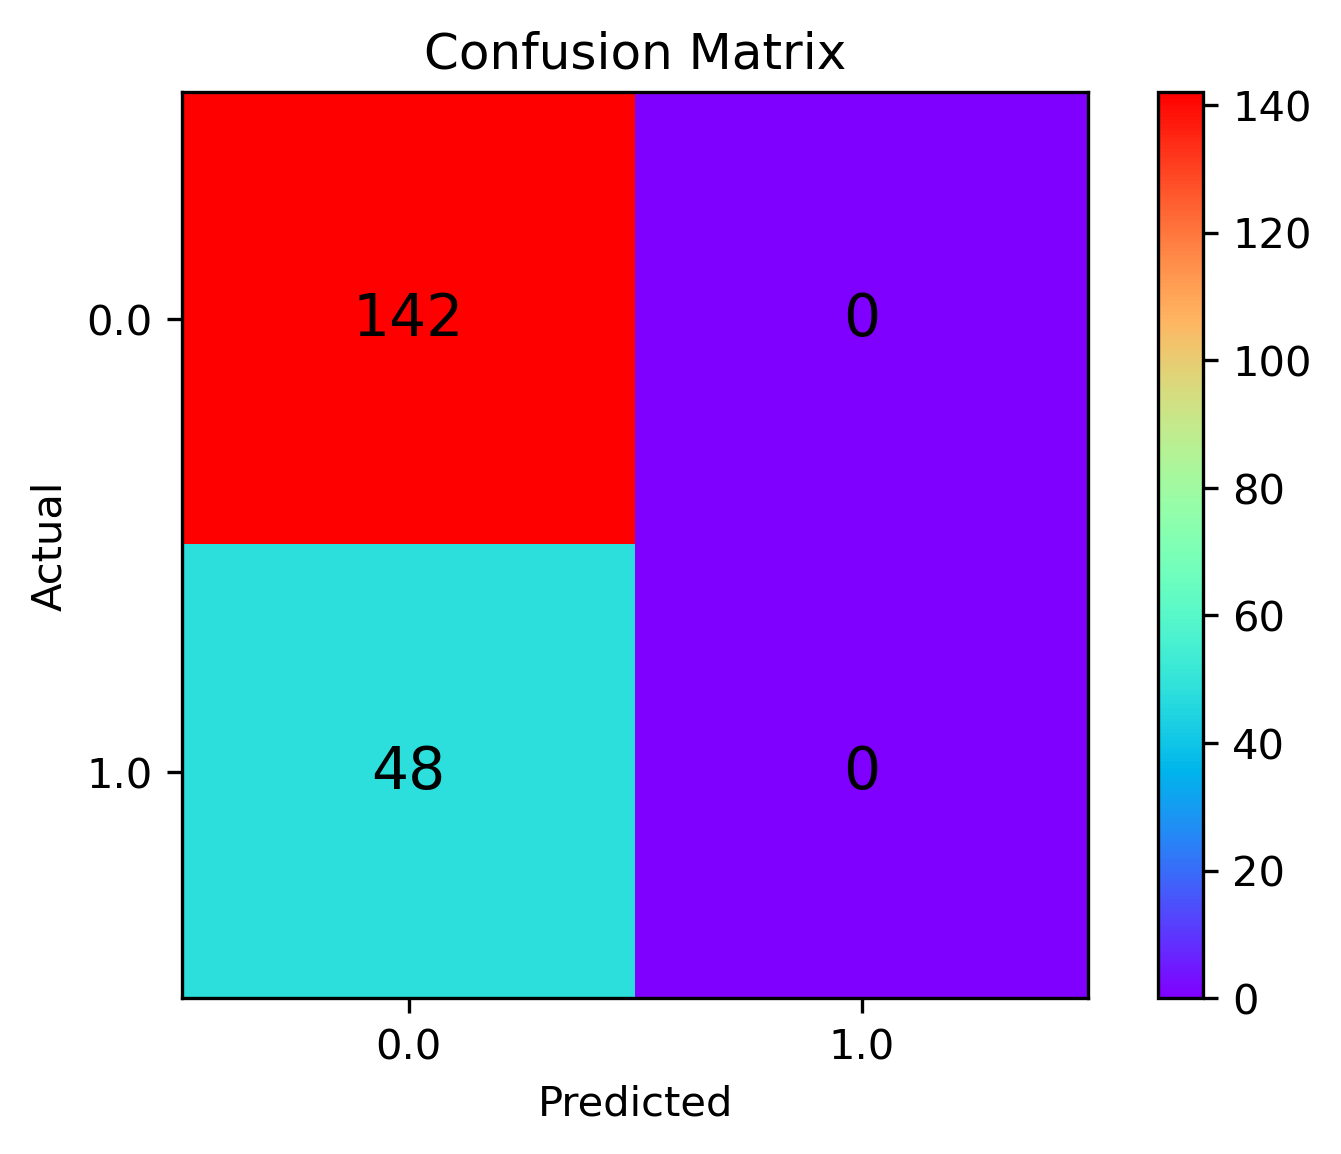

In [195]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Prediction on test set
y_pred = clf.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
plt.figure(dpi=300)
plt.imshow(cm, cmap="rainbow")
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(np.arange(len(set(y))), set(y))
plt.yticks(np.arange(len(set(y))), set(y))

# Adding text to the confusion matrix cells with larger font size
for i in range(len(set(y))):
    for j in range(len(set(y))):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='black', fontsize=14)
plt.savefig('GUASSIAN_test.png')
plt.show()